In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
%matplotlib inline

In [3]:
regex= re.compile(r'\d+')

In [4]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/predicted/'

In [5]:
model_names = os.listdir(saved_models)

In [69]:
model_names

['predicted_unseen_6positions_85epochs_0.3coeff.npz',
 'predicted_testdata_6positions_35epochs_0.25coeff.npz',
 'predicted_unseen_6positions_20epochs_0.3coeff.npz',
 'predicted_unseen_6positions_65epochs_0.4coeff.npz',
 'predicted_unseen_6positions_65epochs_0.5coeff.npz',
 'predicted_testdata_6positions_5epochs_0.25coeff.npz',
 'predicted_unseen_6positions_10epochs_0.75coeff.npz',
 'predicted_testdata_6positions_70epochs_0.6coeff.npz',
 'predicted_testdata_6positions_70epochs_0.7coeff.npz',
 'predicted_unseen_6positions_30epochs_0.3coeff.npz',
 'predicted_unseen_6positions_75epochs_0.5coeff.npz',
 'predicted_unseen_6positions_75epochs_0.4coeff.npz',
 'predicted_testdata_6positions_65epochs_0.25coeff.npz',
 'predicted_testdata_6positions_100epochs_0.25coeff.npz',
 'predicted_unseen_6positions_95epochs_0.3coeff.npz',
 'predicted_testdata_6positions_60epochs_0.7coeff.npz',
 'predicted_testdata_6positions_60epochs_0.6coeff.npz',
 'predicted_unseen_6positions_80epochs_0.25coeff.npz',
 'pred

In [70]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [71]:
f_list_075, epochs = get_fnames(75, prefix='predicted_unseen')

In [72]:
f_list_075

array(['predicted_unseen_6positions_5epochs_0.75coeff.npz',
       'predicted_unseen_6positions_10epochs_0.75coeff.npz',
       'predicted_unseen_6positions_15epochs_0.75coeff.npz',
       'predicted_unseen_6positions_20epochs_0.75coeff.npz',
       'predicted_unseen_6positions_25epochs_0.75coeff.npz',
       'predicted_unseen_6positions_30epochs_0.75coeff.npz',
       'predicted_unseen_6positions_35epochs_0.75coeff.npz',
       'predicted_unseen_6positions_40epochs_0.75coeff.npz',
       'predicted_unseen_6positions_45epochs_0.75coeff.npz',
       'predicted_unseen_6positions_50epochs_0.75coeff.npz',
       'predicted_unseen_6positions_55epochs_0.75coeff.npz',
       'predicted_unseen_6positions_60epochs_0.75coeff.npz',
       'predicted_unseen_6positions_65epochs_0.75coeff.npz',
       'predicted_unseen_6positions_70epochs_0.75coeff.npz',
       'predicted_unseen_6positions_75epochs_0.75coeff.npz',
       'predicted_unseen_6positions_80epochs_0.75coeff.npz',
       'predicted_unseen_

In [73]:
def mse_vs_epochs(coeff, prefix):
    mse = []
    epchs = []
    f_list, epochs = get_fnames(coeff, prefix)
    for fname, e in zip(f_list, epochs):
        print(fname, e)
        data = np.load(os.path.join(saved_models, fname))
        y_true, y_pred = data['true'], data['pred']
        error = mean_squared_error(y_true, y_pred)
        
        epchs.append(e)
        mse.append(error)
    plt.plot(epchs, mse)
    return mse, epchs

predicted_unseen_6positions_5epochs_0.75coeff.npz 5
predicted_unseen_6positions_10epochs_0.75coeff.npz 10
predicted_unseen_6positions_15epochs_0.75coeff.npz 15
predicted_unseen_6positions_20epochs_0.75coeff.npz 20
predicted_unseen_6positions_25epochs_0.75coeff.npz 25
predicted_unseen_6positions_30epochs_0.75coeff.npz 30
predicted_unseen_6positions_35epochs_0.75coeff.npz 35
predicted_unseen_6positions_40epochs_0.75coeff.npz 40
predicted_unseen_6positions_45epochs_0.75coeff.npz 45
predicted_unseen_6positions_50epochs_0.75coeff.npz 50
predicted_unseen_6positions_55epochs_0.75coeff.npz 55
predicted_unseen_6positions_60epochs_0.75coeff.npz 60
predicted_unseen_6positions_65epochs_0.75coeff.npz 65
predicted_unseen_6positions_70epochs_0.75coeff.npz 70
predicted_unseen_6positions_75epochs_0.75coeff.npz 75
predicted_unseen_6positions_80epochs_0.75coeff.npz 80
predicted_unseen_6positions_85epochs_0.75coeff.npz 85
predicted_unseen_6positions_90epochs_0.75coeff.npz 90
predicted_unseen_6positions_95

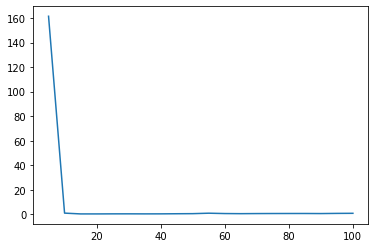

In [74]:
mse_075_unseen, epochs_075 = mse_vs_epochs(75, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.7coeff.npz 5
predicted_unseen_6positions_10epochs_0.7coeff.npz 10
predicted_unseen_6positions_15epochs_0.7coeff.npz 15
predicted_unseen_6positions_20epochs_0.7coeff.npz 20
predicted_unseen_6positions_25epochs_0.7coeff.npz 25
predicted_unseen_6positions_30epochs_0.7coeff.npz 30
predicted_unseen_6positions_35epochs_0.7coeff.npz 35
predicted_unseen_6positions_40epochs_0.7coeff.npz 40
predicted_unseen_6positions_45epochs_0.7coeff.npz 45
predicted_unseen_6positions_50epochs_0.7coeff.npz 50
predicted_unseen_6positions_55epochs_0.7coeff.npz 55
predicted_unseen_6positions_60epochs_0.7coeff.npz 60
predicted_unseen_6positions_65epochs_0.7coeff.npz 65
predicted_unseen_6positions_70epochs_0.7coeff.npz 70
predicted_unseen_6positions_75epochs_0.7coeff.npz 75
predicted_unseen_6positions_80epochs_0.7coeff.npz 80
predicted_unseen_6positions_85epochs_0.7coeff.npz 85
predicted_unseen_6positions_90epochs_0.7coeff.npz 90
predicted_unseen_6positions_95epochs_0.7coeff.np

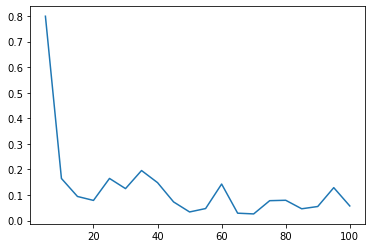

In [75]:
mse_070_unseen, epochs_070 = mse_vs_epochs(7,prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.6coeff.npz 5
predicted_unseen_6positions_10epochs_0.6coeff.npz 10
predicted_unseen_6positions_15epochs_0.6coeff.npz 15
predicted_unseen_6positions_20epochs_0.6coeff.npz 20
predicted_unseen_6positions_25epochs_0.6coeff.npz 25
predicted_unseen_6positions_30epochs_0.6coeff.npz 30
predicted_unseen_6positions_35epochs_0.6coeff.npz 35
predicted_unseen_6positions_40epochs_0.6coeff.npz 40
predicted_unseen_6positions_45epochs_0.6coeff.npz 45
predicted_unseen_6positions_50epochs_0.6coeff.npz 50
predicted_unseen_6positions_55epochs_0.6coeff.npz 55
predicted_unseen_6positions_60epochs_0.6coeff.npz 60
predicted_unseen_6positions_65epochs_0.6coeff.npz 65
predicted_unseen_6positions_70epochs_0.6coeff.npz 70
predicted_unseen_6positions_75epochs_0.6coeff.npz 75
predicted_unseen_6positions_80epochs_0.6coeff.npz 80
predicted_unseen_6positions_85epochs_0.6coeff.npz 85
predicted_unseen_6positions_90epochs_0.6coeff.npz 90
predicted_unseen_6positions_95epochs_0.6coeff.np

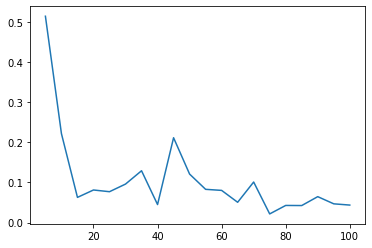

In [76]:
mse_060_unseen, epochs_060 = mse_vs_epochs(6,prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.5coeff.npz 5
predicted_unseen_6positions_10epochs_0.5coeff.npz 10
predicted_unseen_6positions_15epochs_0.5coeff.npz 15
predicted_unseen_6positions_20epochs_0.5coeff.npz 20
predicted_unseen_6positions_25epochs_0.5coeff.npz 25
predicted_unseen_6positions_30epochs_0.5coeff.npz 30
predicted_unseen_6positions_35epochs_0.5coeff.npz 35
predicted_unseen_6positions_40epochs_0.5coeff.npz 40
predicted_unseen_6positions_45epochs_0.5coeff.npz 45
predicted_unseen_6positions_50epochs_0.5coeff.npz 50
predicted_unseen_6positions_55epochs_0.5coeff.npz 55
predicted_unseen_6positions_60epochs_0.5coeff.npz 60
predicted_unseen_6positions_65epochs_0.5coeff.npz 65
predicted_unseen_6positions_70epochs_0.5coeff.npz 70
predicted_unseen_6positions_75epochs_0.5coeff.npz 75
predicted_unseen_6positions_80epochs_0.5coeff.npz 80
predicted_unseen_6positions_85epochs_0.5coeff.npz 85
predicted_unseen_6positions_90epochs_0.5coeff.npz 90
predicted_unseen_6positions_95epochs_0.5coeff.np

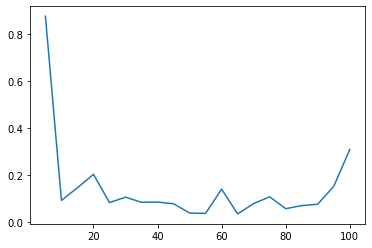

In [77]:
mse_050_unseen, epochs_050 = mse_vs_epochs(5,prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.4coeff.npz 5
predicted_unseen_6positions_10epochs_0.4coeff.npz 10
predicted_unseen_6positions_15epochs_0.4coeff.npz 15
predicted_unseen_6positions_20epochs_0.4coeff.npz 20
predicted_unseen_6positions_25epochs_0.4coeff.npz 25
predicted_unseen_6positions_30epochs_0.4coeff.npz 30
predicted_unseen_6positions_35epochs_0.4coeff.npz 35
predicted_unseen_6positions_40epochs_0.4coeff.npz 40
predicted_unseen_6positions_45epochs_0.4coeff.npz 45
predicted_unseen_6positions_50epochs_0.4coeff.npz 50
predicted_unseen_6positions_55epochs_0.4coeff.npz 55
predicted_unseen_6positions_60epochs_0.4coeff.npz 60
predicted_unseen_6positions_65epochs_0.4coeff.npz 65
predicted_unseen_6positions_70epochs_0.4coeff.npz 70
predicted_unseen_6positions_75epochs_0.4coeff.npz 75
predicted_unseen_6positions_80epochs_0.4coeff.npz 80
predicted_unseen_6positions_85epochs_0.4coeff.npz 85
predicted_unseen_6positions_90epochs_0.4coeff.npz 90
predicted_unseen_6positions_95epochs_0.4coeff.np

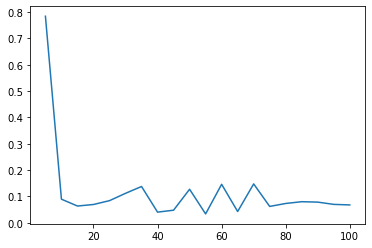

In [80]:
mse_040_unseen, epochs_040 = mse_vs_epochs(4,prefix='predicted_unseen')

predicted_testdata_6positions_5epochs_0.4coeff.npz 5
predicted_testdata_6positions_10epochs_0.4coeff.npz 10
predicted_testdata_6positions_15epochs_0.4coeff.npz 15
predicted_testdata_6positions_20epochs_0.4coeff.npz 20
predicted_testdata_6positions_25epochs_0.4coeff.npz 25
predicted_testdata_6positions_30epochs_0.4coeff.npz 30
predicted_testdata_6positions_35epochs_0.4coeff.npz 35
predicted_testdata_6positions_40epochs_0.4coeff.npz 40
predicted_testdata_6positions_45epochs_0.4coeff.npz 45
predicted_testdata_6positions_50epochs_0.4coeff.npz 50
predicted_testdata_6positions_55epochs_0.4coeff.npz 55
predicted_testdata_6positions_60epochs_0.4coeff.npz 60
predicted_testdata_6positions_65epochs_0.4coeff.npz 65
predicted_testdata_6positions_70epochs_0.4coeff.npz 70
predicted_testdata_6positions_75epochs_0.4coeff.npz 75
predicted_testdata_6positions_80epochs_0.4coeff.npz 80
predicted_testdata_6positions_85epochs_0.4coeff.npz 85
predicted_testdata_6positions_90epochs_0.4coeff.npz 90
predicted_te

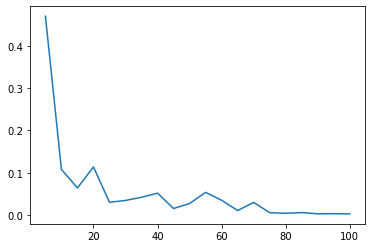

In [82]:
mse_040_test, epochs_040 = mse_vs_epochs(4,prefix='predicted_test')

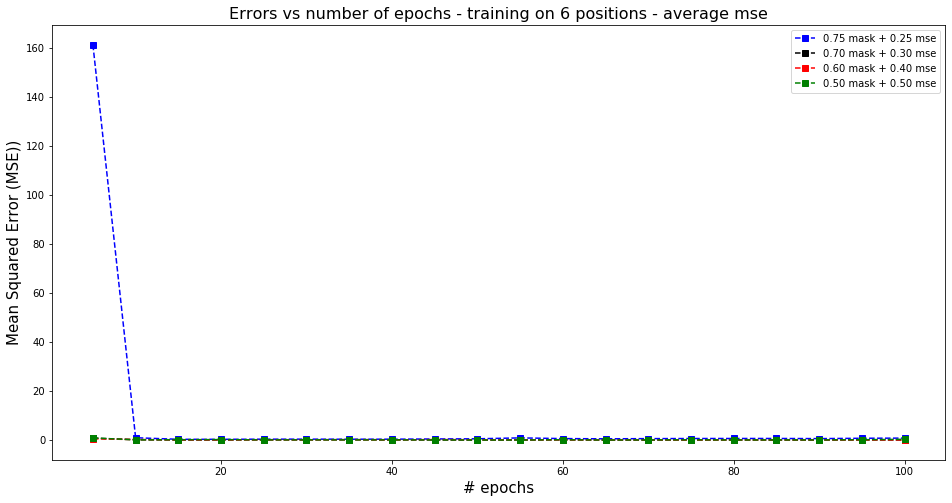

In [78]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_075, mse_075_unseen, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070_unseen,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060_unseen, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs_060, mse_050_unseen, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

predicted_testdata_6positions_5epochs_0.75coeff.npz 5
predicted_testdata_6positions_10epochs_0.75coeff.npz 10
predicted_testdata_6positions_15epochs_0.75coeff.npz 15
predicted_testdata_6positions_20epochs_0.75coeff.npz 20
predicted_testdata_6positions_25epochs_0.75coeff.npz 25
predicted_testdata_6positions_30epochs_0.75coeff.npz 30
predicted_testdata_6positions_35epochs_0.75coeff.npz 35
predicted_testdata_6positions_40epochs_0.75coeff.npz 40
predicted_testdata_6positions_45epochs_0.75coeff.npz 45
predicted_testdata_6positions_50epochs_0.75coeff.npz 50
predicted_testdata_6positions_55epochs_0.75coeff.npz 55
predicted_testdata_6positions_60epochs_0.75coeff.npz 60
predicted_testdata_6positions_65epochs_0.75coeff.npz 65
predicted_testdata_6positions_70epochs_0.75coeff.npz 70
predicted_testdata_6positions_75epochs_0.75coeff.npz 75
predicted_testdata_6positions_80epochs_0.75coeff.npz 80
predicted_testdata_6positions_85epochs_0.75coeff.npz 85
predicted_testdata_6positions_90epochs_0.75coeff.n

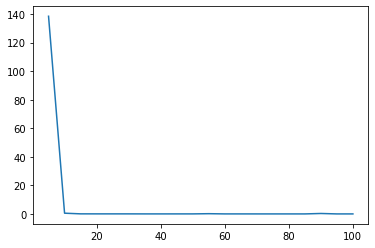

In [79]:
mse_075_test, epochs_075 = mse_vs_epochs(75, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.7coeff.npz 5
predicted_testdata_6positions_10epochs_0.7coeff.npz 10
predicted_testdata_6positions_15epochs_0.7coeff.npz 15
predicted_testdata_6positions_20epochs_0.7coeff.npz 20
predicted_testdata_6positions_25epochs_0.7coeff.npz 25
predicted_testdata_6positions_30epochs_0.7coeff.npz 30
predicted_testdata_6positions_35epochs_0.7coeff.npz 35
predicted_testdata_6positions_40epochs_0.7coeff.npz 40
predicted_testdata_6positions_45epochs_0.7coeff.npz 45
predicted_testdata_6positions_50epochs_0.7coeff.npz 50
predicted_testdata_6positions_55epochs_0.7coeff.npz 55
predicted_testdata_6positions_60epochs_0.7coeff.npz 60
predicted_testdata_6positions_65epochs_0.7coeff.npz 65
predicted_testdata_6positions_70epochs_0.7coeff.npz 70
predicted_testdata_6positions_75epochs_0.7coeff.npz 75
predicted_testdata_6positions_80epochs_0.7coeff.npz 80
predicted_testdata_6positions_85epochs_0.7coeff.npz 85
predicted_testdata_6positions_90epochs_0.7coeff.npz 90
predicted_te

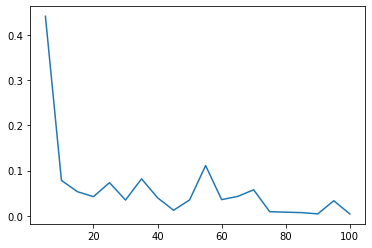

In [17]:
mse_070_test, epochs_070 = mse_vs_epochs(7, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.6coeff.npz 5
predicted_testdata_6positions_10epochs_0.6coeff.npz 10
predicted_testdata_6positions_15epochs_0.6coeff.npz 15
predicted_testdata_6positions_20epochs_0.6coeff.npz 20
predicted_testdata_6positions_25epochs_0.6coeff.npz 25
predicted_testdata_6positions_30epochs_0.6coeff.npz 30
predicted_testdata_6positions_35epochs_0.6coeff.npz 35
predicted_testdata_6positions_40epochs_0.6coeff.npz 40
predicted_testdata_6positions_45epochs_0.6coeff.npz 45
predicted_testdata_6positions_50epochs_0.6coeff.npz 50
predicted_testdata_6positions_55epochs_0.6coeff.npz 55
predicted_testdata_6positions_60epochs_0.6coeff.npz 60
predicted_testdata_6positions_65epochs_0.6coeff.npz 65
predicted_testdata_6positions_70epochs_0.6coeff.npz 70
predicted_testdata_6positions_75epochs_0.6coeff.npz 75
predicted_testdata_6positions_80epochs_0.6coeff.npz 80
predicted_testdata_6positions_85epochs_0.6coeff.npz 85
predicted_testdata_6positions_90epochs_0.6coeff.npz 90
predicted_te

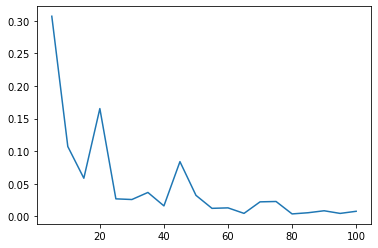

In [18]:
mse_060_test, epochs_060 = mse_vs_epochs(6, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.5coeff.npz 5
predicted_testdata_6positions_10epochs_0.5coeff.npz 10
predicted_testdata_6positions_15epochs_0.5coeff.npz 15
predicted_testdata_6positions_20epochs_0.5coeff.npz 20
predicted_testdata_6positions_25epochs_0.5coeff.npz 25
predicted_testdata_6positions_30epochs_0.5coeff.npz 30
predicted_testdata_6positions_35epochs_0.5coeff.npz 35
predicted_testdata_6positions_40epochs_0.5coeff.npz 40
predicted_testdata_6positions_45epochs_0.5coeff.npz 45
predicted_testdata_6positions_50epochs_0.5coeff.npz 50
predicted_testdata_6positions_55epochs_0.5coeff.npz 55
predicted_testdata_6positions_60epochs_0.5coeff.npz 60
predicted_testdata_6positions_65epochs_0.5coeff.npz 65
predicted_testdata_6positions_70epochs_0.5coeff.npz 70
predicted_testdata_6positions_75epochs_0.5coeff.npz 75
predicted_testdata_6positions_80epochs_0.5coeff.npz 80
predicted_testdata_6positions_85epochs_0.5coeff.npz 85
predicted_testdata_6positions_90epochs_0.5coeff.npz 90
predicted_te

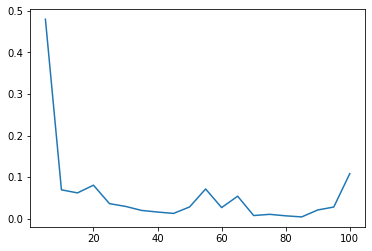

In [19]:
mse_050_test, epochs_050 = mse_vs_epochs(5, prefix='predicted_testdata')

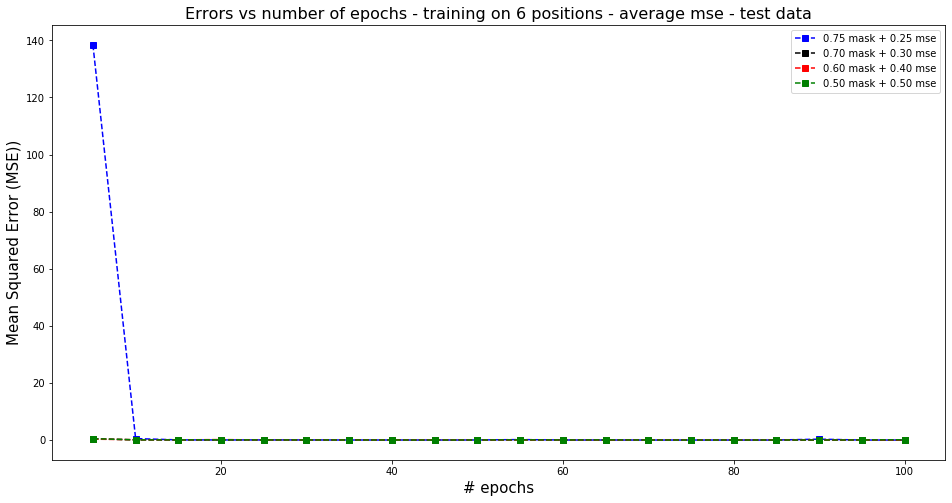

In [20]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse - test data",size=16)
ax1.plot(epochs_075, mse_075_test, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070_test,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060_test, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050, mse_050_test, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

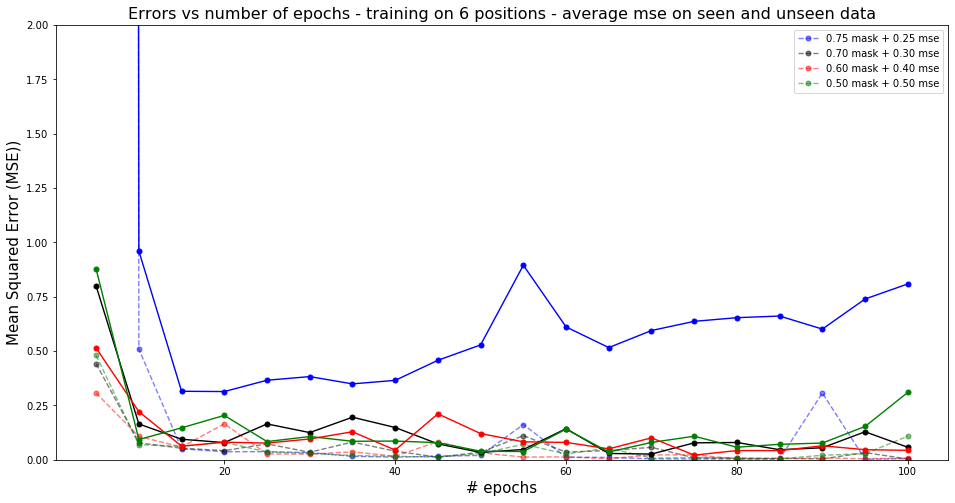

In [21]:
fig1, ax1 = plt.subplots(figsize=(16,8))
marker=5
plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs_075, mse_075_test, 'o--', linewidth=1.4, ms=marker, c='blue',label='0.75 mask + 0.25 mse', alpha=0.5)
ax1.plot(epochs_070, mse_070_test,'o--', linewidth=1.4, ms=marker, c='k', label='0.70 mask + 0.30 mse', alpha=0.5)
ax1.plot(epochs_060, mse_060_test, 'o--', linewidth=1.4, ms=marker, c='red', label='0.60 mask + 0.40 mse', alpha=0.5)
ax1.plot(epochs_050, mse_050_test, 'o--', linewidth=1.4, ms=marker, c='green', label='0.50 mask + 0.50 mse', alpha=0.5)

ax1.plot(epochs_075, mse_075_unseen, 'o-', linewidth=1.4, ms=marker, c='blue')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070_unseen,'o-', linewidth=1.4, ms=marker, c='k')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060_unseen, 'o-', linewidth=1.4, ms=marker, c='red')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050, mse_050_unseen, 'o-', linewidth=1.4, ms=marker, c='green')#, label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
plt.ylim(0., 2)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

In [39]:
import matplotlib

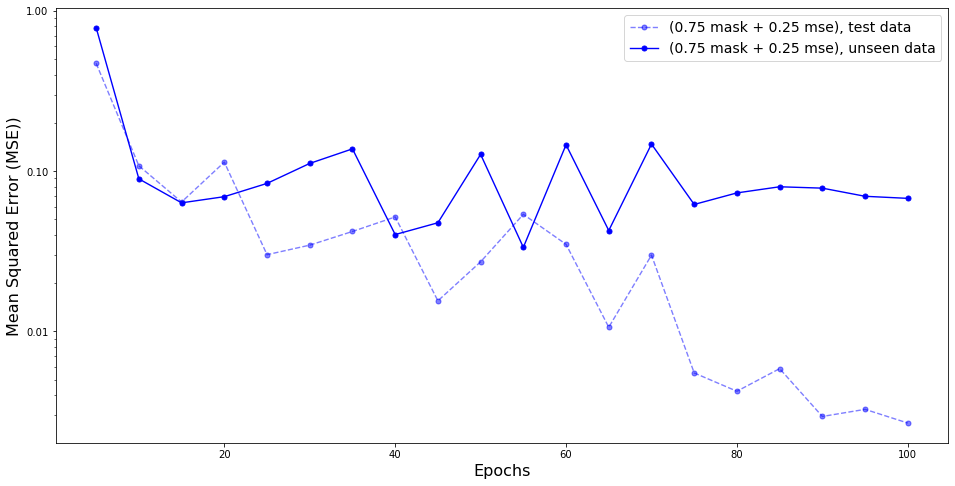

In [83]:
fig1, ax1 = plt.subplots(figsize=(16,8))
marker=5
#plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs_040, mse_040_test, 'o--', linewidth=1.4, ms=marker, c='blue',label='(0.75 mask + 0.25 mse), test data', alpha=0.5)
#ax1.plot(epochs_070, mse_070_test,'o--', linewidth=1.4, ms=marker, c='k', label='0.70 mask + 0.30 mse', alpha=0.5)

ax1.plot(epochs_040, mse_040_unseen, 'o-', linewidth=1.4, ms=marker, c='blue',label='(0.75 mask + 0.25 mse), unseen data')
#ax1.plot(epochs_070, mse_070_unseen,'o-', linewidth=1.4, ms=marker, c='k')#, label='0.70 mask + 0.30 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=16)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("Epochs", size=16)
#plt.ylim(0., 2)
ax1.set_yscale('log')
#ax1.set_yticks([0.005, 0.01, 0.5, 1])
#ax1.set_yticks([ 0, 1, 10, 100])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.legend(loc='upper right', prop={'size': 14})
plt.show()

predicted_testdata_6positions_5epochs_0.25coeff.npz 5
predicted_testdata_6positions_10epochs_0.25coeff.npz 10
predicted_testdata_6positions_15epochs_0.25coeff.npz 15
predicted_testdata_6positions_20epochs_0.25coeff.npz 20
predicted_testdata_6positions_25epochs_0.25coeff.npz 25
predicted_testdata_6positions_30epochs_0.25coeff.npz 30
predicted_testdata_6positions_35epochs_0.25coeff.npz 35
predicted_testdata_6positions_40epochs_0.25coeff.npz 40
predicted_testdata_6positions_45epochs_0.25coeff.npz 45
predicted_testdata_6positions_50epochs_0.25coeff.npz 50
predicted_testdata_6positions_55epochs_0.25coeff.npz 55
predicted_testdata_6positions_60epochs_0.25coeff.npz 60
predicted_testdata_6positions_65epochs_0.25coeff.npz 65
predicted_testdata_6positions_70epochs_0.25coeff.npz 70
predicted_testdata_6positions_75epochs_0.25coeff.npz 75
predicted_testdata_6positions_80epochs_0.25coeff.npz 80
predicted_testdata_6positions_85epochs_0.25coeff.npz 85
predicted_testdata_6positions_90epochs_0.25coeff.n

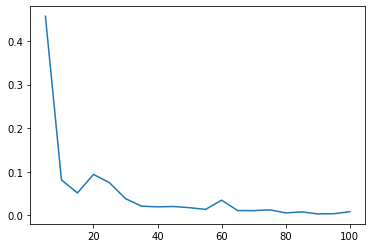

In [28]:
mse_025_test, epochs_025 = mse_vs_epochs(25, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.3coeff.npz 5
predicted_testdata_6positions_10epochs_0.3coeff.npz 10
predicted_testdata_6positions_15epochs_0.3coeff.npz 15
predicted_testdata_6positions_20epochs_0.3coeff.npz 20
predicted_testdata_6positions_25epochs_0.3coeff.npz 25
predicted_testdata_6positions_30epochs_0.3coeff.npz 30
predicted_testdata_6positions_35epochs_0.3coeff.npz 35
predicted_testdata_6positions_40epochs_0.3coeff.npz 40
predicted_testdata_6positions_45epochs_0.3coeff.npz 45
predicted_testdata_6positions_50epochs_0.3coeff.npz 50
predicted_testdata_6positions_55epochs_0.3coeff.npz 55
predicted_testdata_6positions_60epochs_0.3coeff.npz 60
predicted_testdata_6positions_65epochs_0.3coeff.npz 65
predicted_testdata_6positions_70epochs_0.3coeff.npz 70
predicted_testdata_6positions_75epochs_0.3coeff.npz 75
predicted_testdata_6positions_80epochs_0.3coeff.npz 80
predicted_testdata_6positions_85epochs_0.3coeff.npz 85
predicted_testdata_6positions_90epochs_0.3coeff.npz 90
predicted_te

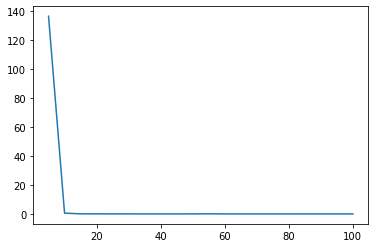

In [29]:
mse_030_test, epochs_030 = mse_vs_epochs(3, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.4coeff.npz 5
predicted_testdata_6positions_10epochs_0.4coeff.npz 10
predicted_testdata_6positions_15epochs_0.4coeff.npz 15
predicted_testdata_6positions_20epochs_0.4coeff.npz 20
predicted_testdata_6positions_25epochs_0.4coeff.npz 25
predicted_testdata_6positions_30epochs_0.4coeff.npz 30
predicted_testdata_6positions_35epochs_0.4coeff.npz 35
predicted_testdata_6positions_40epochs_0.4coeff.npz 40
predicted_testdata_6positions_45epochs_0.4coeff.npz 45
predicted_testdata_6positions_50epochs_0.4coeff.npz 50
predicted_testdata_6positions_55epochs_0.4coeff.npz 55
predicted_testdata_6positions_60epochs_0.4coeff.npz 60
predicted_testdata_6positions_65epochs_0.4coeff.npz 65
predicted_testdata_6positions_70epochs_0.4coeff.npz 70
predicted_testdata_6positions_75epochs_0.4coeff.npz 75
predicted_testdata_6positions_80epochs_0.4coeff.npz 80
predicted_testdata_6positions_85epochs_0.4coeff.npz 85
predicted_testdata_6positions_90epochs_0.4coeff.npz 90
predicted_te

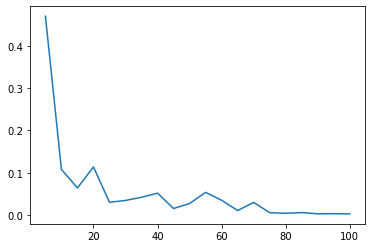

In [30]:
mse_040_test, epochs_040 = mse_vs_epochs(4, prefix='predicted_testdata')

predicted_unseen_6positions_5epochs_0.25coeff.npz 5
predicted_unseen_6positions_10epochs_0.25coeff.npz 10
predicted_unseen_6positions_15epochs_0.25coeff.npz 15
predicted_unseen_6positions_20epochs_0.25coeff.npz 20
predicted_unseen_6positions_25epochs_0.25coeff.npz 25
predicted_unseen_6positions_30epochs_0.25coeff.npz 30
predicted_unseen_6positions_35epochs_0.25coeff.npz 35
predicted_unseen_6positions_40epochs_0.25coeff.npz 40
predicted_unseen_6positions_45epochs_0.25coeff.npz 45
predicted_unseen_6positions_50epochs_0.25coeff.npz 50
predicted_unseen_6positions_55epochs_0.25coeff.npz 55
predicted_unseen_6positions_60epochs_0.25coeff.npz 60
predicted_unseen_6positions_65epochs_0.25coeff.npz 65
predicted_unseen_6positions_70epochs_0.25coeff.npz 70
predicted_unseen_6positions_75epochs_0.25coeff.npz 75
predicted_unseen_6positions_80epochs_0.25coeff.npz 80
predicted_unseen_6positions_85epochs_0.25coeff.npz 85
predicted_unseen_6positions_90epochs_0.25coeff.npz 90
predicted_unseen_6positions_95

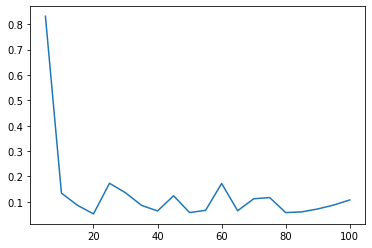

In [31]:
mse_025_unseen, epochs_025 = mse_vs_epochs(25, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.3coeff.npz 5
predicted_unseen_6positions_10epochs_0.3coeff.npz 10
predicted_unseen_6positions_15epochs_0.3coeff.npz 15
predicted_unseen_6positions_20epochs_0.3coeff.npz 20
predicted_unseen_6positions_25epochs_0.3coeff.npz 25
predicted_unseen_6positions_30epochs_0.3coeff.npz 30
predicted_unseen_6positions_35epochs_0.3coeff.npz 35
predicted_unseen_6positions_40epochs_0.3coeff.npz 40
predicted_unseen_6positions_45epochs_0.3coeff.npz 45
predicted_unseen_6positions_50epochs_0.3coeff.npz 50
predicted_unseen_6positions_55epochs_0.3coeff.npz 55
predicted_unseen_6positions_60epochs_0.3coeff.npz 60
predicted_unseen_6positions_65epochs_0.3coeff.npz 65
predicted_unseen_6positions_70epochs_0.3coeff.npz 70
predicted_unseen_6positions_75epochs_0.3coeff.npz 75
predicted_unseen_6positions_80epochs_0.3coeff.npz 80
predicted_unseen_6positions_85epochs_0.3coeff.npz 85
predicted_unseen_6positions_90epochs_0.3coeff.npz 90
predicted_unseen_6positions_95epochs_0.3coeff.np

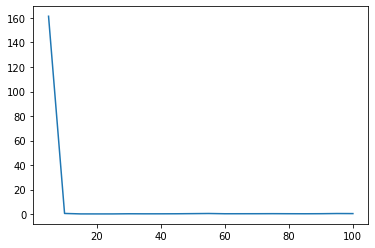

In [32]:
mse_030_unseen, epochs_030 = mse_vs_epochs(3, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.4coeff.npz 5
predicted_unseen_6positions_10epochs_0.4coeff.npz 10
predicted_unseen_6positions_15epochs_0.4coeff.npz 15
predicted_unseen_6positions_20epochs_0.4coeff.npz 20
predicted_unseen_6positions_25epochs_0.4coeff.npz 25
predicted_unseen_6positions_30epochs_0.4coeff.npz 30
predicted_unseen_6positions_35epochs_0.4coeff.npz 35
predicted_unseen_6positions_40epochs_0.4coeff.npz 40
predicted_unseen_6positions_45epochs_0.4coeff.npz 45
predicted_unseen_6positions_50epochs_0.4coeff.npz 50
predicted_unseen_6positions_55epochs_0.4coeff.npz 55
predicted_unseen_6positions_60epochs_0.4coeff.npz 60
predicted_unseen_6positions_65epochs_0.4coeff.npz 65
predicted_unseen_6positions_70epochs_0.4coeff.npz 70
predicted_unseen_6positions_75epochs_0.4coeff.npz 75
predicted_unseen_6positions_80epochs_0.4coeff.npz 80
predicted_unseen_6positions_85epochs_0.4coeff.npz 85
predicted_unseen_6positions_90epochs_0.4coeff.npz 90
predicted_unseen_6positions_95epochs_0.4coeff.np

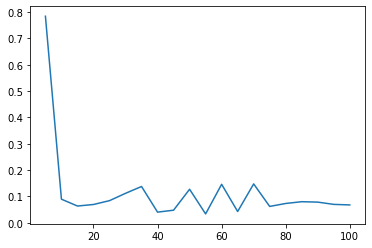

In [35]:
mse_040_unseen, epochs_040 = mse_vs_epochs(4, prefix='predicted_unseen')

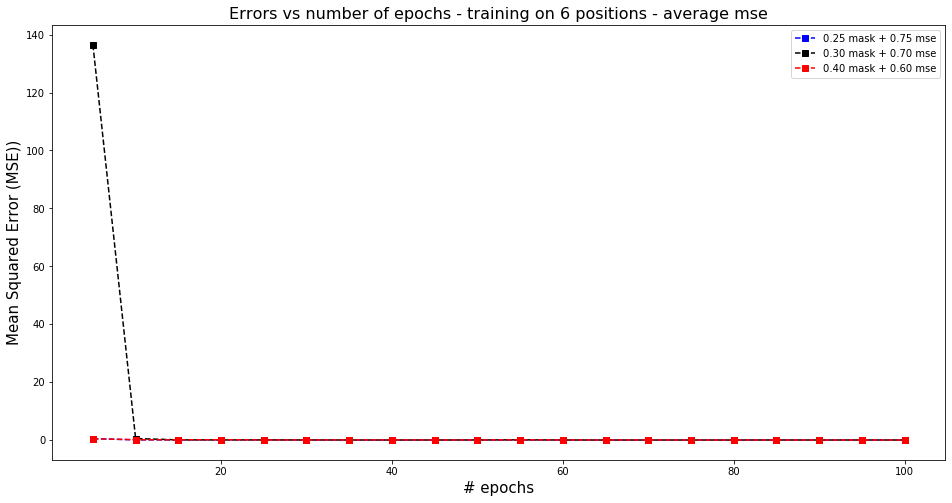

In [36]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_025, mse_025_test, 's--', linewidth=1.5, c='blue',label='0.25 mask + 0.75 mse')
ax1.plot(epochs_030, mse_030_test,'s--', linewidth=1.5, c='k', label='0.30 mask + 0.70 mse')
ax1.plot(epochs_040, mse_040_test, 's--', linewidth=1.5, c='red', label='0.40 mask + 0.60 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

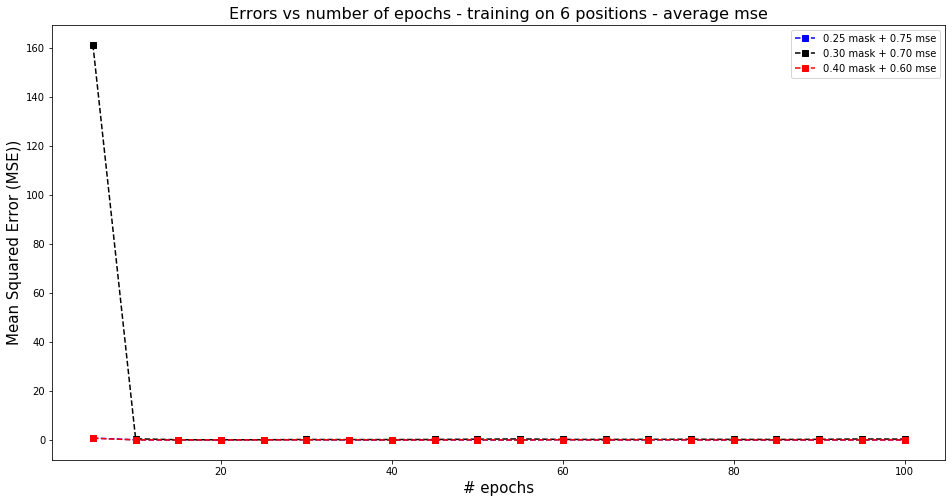

In [37]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_025, mse_025_unseen, 's--', linewidth=1.5, c='blue',label='0.25 mask + 0.75 mse')
ax1.plot(epochs_030, mse_030_unseen,'s--', linewidth=1.5, c='k', label='0.30 mask + 0.70 mse')
ax1.plot(epochs_040, mse_040_unseen, 's--', linewidth=1.5, c='red', label='0.40 mask + 0.60 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

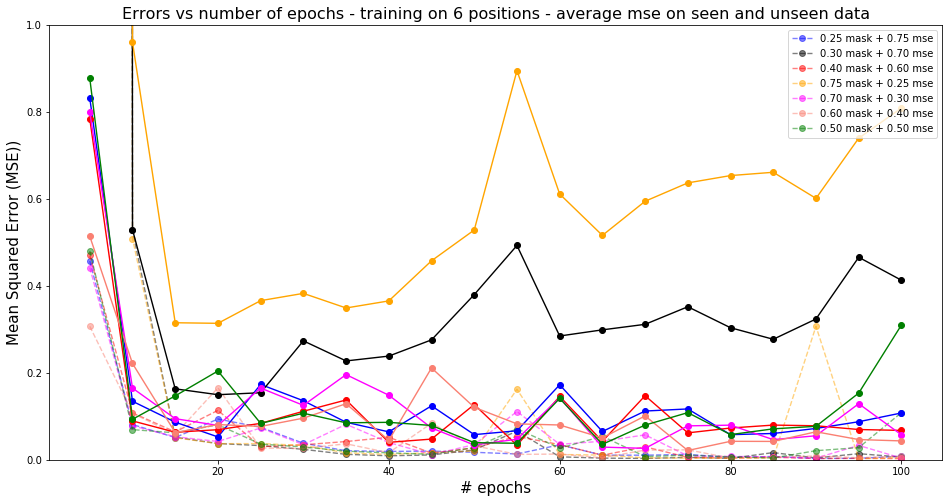

In [39]:
fig1, ax1 = plt.subplots(figsize=(16,8))
marker=6
plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs_025, mse_025_test, 'o--', linewidth=1.4, ms=marker, c='blue',label='0.25 mask + 0.75 mse', alpha=0.5)
ax1.plot(epochs_030, mse_030_test,'o--', linewidth=1.4, ms=marker, c='k', label='0.30 mask + 0.70 mse', alpha=0.5)
ax1.plot(epochs_040, mse_040_test, 'o--', linewidth=1.4, ms=marker, c='red', label='0.40 mask + 0.60 mse', alpha=0.5)
ax1.plot(epochs_075[:20], mse_075_test[:20], 'o--', linewidth=1.4, ms=marker, c='orange',label='0.75 mask + 0.25 mse', alpha=0.5)
ax1.plot(epochs_070[:20], mse_070_test[:20],'o--', linewidth=1.4, ms=marker, c='magenta', label='0.70 mask + 0.30 mse', alpha=0.5)
ax1.plot(epochs_060[:20], mse_060_test[:20], 'o--', linewidth=1.4, ms=marker, c='salmon', label='0.60 mask + 0.40 mse', alpha=0.5)
ax1.plot(epochs_050[:20], mse_050_test[:20], 'o--', linewidth=1.4, ms=marker, c='green', label='0.50 mask + 0.50 mse', alpha=0.5)



ax1.plot(epochs_025, mse_025_unseen, 'o-', linewidth=1.4, ms=marker, c='blue')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_030, mse_030_unseen,'o-', linewidth=1.4, ms=marker, c='k')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_040, mse_040_unseen, 'o-', linewidth=1.4, ms=marker, c='red')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_075[:20], mse_075_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='orange')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070[:20], mse_070_unseen[:20],'o-', linewidth=1.4, ms=marker, c='magenta')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060[:20], mse_060_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='salmon')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050[:20], mse_050_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='green')#, label='0.50 mask + 0.50 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

In [56]:
from functools import partial

In [57]:
def min_deltas(unseen, test, epochs):
    deltalist = [(e, abs(u-t)) for e, u, t in zip(epochs, unseen, test)]
    return deltalist, min(deltalist, key=lambda e: e[1])
    

In [64]:
min_delta_075 = min_deltas(mse_075_unseen, mse_075_test, epochs_075)

In [65]:
min_delta_075

([(5, 22.95776332458027),
  (10, 0.45136646709459194),
  (15, 0.264403548409351),
  (20, 0.27667956877288596),
  (25, 0.3287659601163064),
  (30, 0.34951241882851186),
  (35, 0.3332004175791568),
  (40, 0.3530799989845313),
  (45, 0.4411051554868241),
  (50, 0.5082711161127738),
  (55, 0.7327503036989897),
  (60, 0.5989306506769677),
  (65, 0.5052316390576492),
  (70, 0.5900292239320458),
  (75, 0.6329288913454674),
  (80, 0.6497229464586787),
  (85, 0.6572479473956547),
  (90, 0.2942199450938094),
  (95, 0.7370378950027094),
  (100, 0.8036057937004799)],
 (15, 0.264403548409351))

In [66]:
mse_075_unseen

[161.41940840166907,
 0.9601488407349379,
 0.3151425941753968,
 0.3138384183147938,
 0.36600150864246467,
 0.38269297876349695,
 0.3491091310619464,
 0.3653658202669133,
 0.4576189261177242,
 0.5284272207565014,
 0.8949040278947361,
 0.6111616415169453,
 0.5160295682425377,
 0.5945355900367555,
 0.6367647610985726,
 0.6535891343075546,
 0.6611627465499058,
 0.6011540502419149,
 0.7395310539339406,
 0.808782128423745]

In [67]:
mse_075_test

[138.4616450770888,
 0.508782373640346,
 0.05073904576604582,
 0.03715884954190783,
 0.037235548526158284,
 0.033180559934985095,
 0.01590871348278962,
 0.012285821282381988,
 0.01651377063090008,
 0.020156104643727583,
 0.16215372419574633,
 0.012230990839977569,
 0.01079792918488845,
 0.004506366104709632,
 0.0038358697531052405,
 0.0038661878488759054,
 0.003914799154251027,
 0.30693410514810554,
 0.00249315893123111,
 0.00517633472326502]

In [87]:
0.808782128423745-0.00517633472326502

0.8036057937004799

In [63]:
min_delta_075[0]

15

In [59]:
min_delta_030 = min_deltas(mse_030_unseen, mse_030_test, epochs_030)[1]
min_delta_030

(10, 0.001373578566694289)

In [60]:
min_delta_040 = min_deltas(mse_040_unseen, mse_040_test, epochs_040)[1]
min_delta_040

(15, 0.0007611890688413309)

In [65]:
min_delta_040 = min_deltas(mse_040_unseen, mse_040_test, epochs_040)

In [66]:
min_delta_040

([(5, 0.3138946790378298),
  (10, 0.018447584843254525),
  (15, 0.0007611890688413309),
  (20, 0.04445167219380121),
  (25, 0.05367697116639189),
  (30, 0.07709838068891375),
  (35, 0.09555330494921113),
  (40, 0.011572169481023187),
  (45, 0.03209256413812642),
  (50, 0.09992922234279256),
  (55, 0.02027853219893696),
  (60, 0.11096865659538585),
  (65, 0.031970416284185024),
  (70, 0.1174546191812798),
  (75, 0.05641820642097312),
  (80, 0.06885364667598591),
  (85, 0.07395983320705138),
  (90, 0.07531020094320931),
  (95, 0.0663569503503567),
  (100, 0.06489908189994886)],
 (15, 0.0007611890688413309))

In [84]:
mse_040_unseen

[0.783841271350049,
 0.08941188426628438,
 0.0633737735204961,
 0.06924238840485579,
 0.08377553876480671,
 0.11162286994214517,
 0.13756530909593037,
 0.0401860363235255,
 0.04760899522843515,
 0.127106119743056,
 0.03345255904410503,
 0.14589237904351307,
 0.042588427844951655,
 0.1473586900750022,
 0.06192549198710365,
 0.07308921461921523,
 0.0798195124709856,
 0.0782592649400708,
 0.06962304910990184,
 0.06758250927755269]

In [85]:
mse_040_test

[0.4699465923122192,
 0.1078594691095389,
 0.06413496258933743,
 0.113694060598657,
 0.030098567598414828,
 0.03452448925323142,
 0.04201200414671924,
 0.051758205804548686,
 0.015516431090308728,
 0.027176897400263446,
 0.05373109124304199,
 0.03492372244812721,
 0.01061801156076663,
 0.029904070893722413,
 0.005507285566130528,
 0.00423556794322932,
 0.005859679263934226,
 0.0029490639968614775,
 0.003266098759545139,
 0.0026834273776038275]

In [86]:
0.06758250927755269-0.0026834273776038275

0.06489908189994886

In [54]:
loaded_u = np.load('../saved_models/trained_6positions_multi_loss/predicted/predicted_unseen_6positions_100epochs_0.75coeff.npz')

In [55]:
loaded_t = np.load('../saved_models/trained_6positions_multi_loss/predicted/predicted_testdata_6positions_100epochs_0.75coeff.npz')

In [93]:
true_u = loaded_u['true']
pred_u = loaded_u['pred']

In [90]:
true_t = loaded_t['true']
pred_t = loaded_t['pred']

In [74]:
np.sum( (pred-true)**2, axis=0 ) / len(true)

0.06758250927755269

In [101]:
def idx_mse(dist, true_arr, preds_arr):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse

In [94]:
distances_unseen = [1,3,15,30]
distances_testdata = [2,4,10,20,25,35]

In [102]:
mse_u = [idx_mse(d, preds_arr=pred_u, true_arr=true_u)[1] for d in distances_unseen]

1 0.17141122917721116
3 0.014501266429676845
15 0.007489702083939846
30 0.0729172566264323


In [103]:
np.mean(mse_u)

0.06657986357931503

In [106]:
mse_test = [idx_mse(d, preds_arr=pred_t, true_arr=true_t)[1] for d in distances_testdata]

2 0.0027615689558937936
4 0.0025889254369755505
10 0.0026983519895451076
20 0.0026731691746057808
25 0.002443215590108416
35 0.002911549894494778


In [107]:
np.mean(mse_test)

0.0026794635069372374

In [108]:
np.std(mse_test)

0.00014434450096380432

In [61]:
min_delta_050 = min_deltas(mse_050_unseen, mse_050_test, epochs_050)[1]
min_delta_050

(50, 0.011144357073632597)

In [62]:
min_delta_060 = min_deltas(mse_060_unseen, mse_060_test, epochs_060)[1]
min_delta_060

(75, 0.001555172062663191)

In [63]:
min_delta_070 = min_deltas(mse_070_unseen, mse_070_test, epochs_070)[1]
min_delta_070

(50, 0.0009083881294954174)

In [64]:
min_delta_075 = min_deltas(mse_075_unseen, mse_075_test, epochs_075)[1]
min_delta_075

(15, 0.264403548409351)

In [51]:
deltas = [min_delta_025, min_delta_030, min_delta_040, min_delta_050, min_delta_060, min_delta_070, min_delta_075]

In [52]:
min(deltas, key=lambda e: e[1])

(15, 0.0007611890688413309)

In [53]:
deltas

[(15, 0.035404838290821944),
 (10, 0.001373578566694289),
 (15, 0.0007611890688413309),
 (50, 0.011144357073632597),
 (75, 0.001555172062663191),
 (50, 0.0009083881294954174),
 (15, 0.264403548409351)]